In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('temp2_UWRL_river_velocimetry_dataset.csv')
df.datetime = pd.to_datetime(df.datetime)
print(df.columns)
df

Index(['datetime', 'y', 'x', 'v_x', 'v_y', 'v_len', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'turbidity', 'vegetation', 'visibility',
       'cloudcover', 'solarradiation', 'uvindex', 'conditions', 'v_pos',
       'angle', 'angle_var', 'angle_var_support'],
      dtype='object')


,datetime,y,x,v_x,v_y,v_len,s2n,corr,sun_altitude,sun_azimuth,...,vegetation,visibility,cloudcover,solarradiation,uvindex,conditions,v_pos,angle,angle_var,angle_var_support
0,2024-04-10 13:38:23,9.645,0.155,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,none,9.9,0.0,942,9,Clear,0,NaN,NaN,NaN
1,2024-04-10 13:38:23,9.645,0.285,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,none,9.9,0.0,942,9,Clear,0,NaN,NaN,NaN
2,2024-04-10 13:38:23,9.645,0.415,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,none,9.9,0.0,942,9,Clear,0,NaN,NaN,NaN
3,2024-04-10 13:38:23,9.645,0.545,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,none,9.9,0.0,942,9,Clear,0,NaN,NaN,NaN
4,2024-04-10 13:38:23,9.645,0.675,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,none,9.9,0.0,942,9,Clear,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9299131,2024-01-05 13:41:17,0.155,19.525,0.001230,0.010328,0.010401,3.14992,0.48536,0.414650,3.444309,...,none,1.2,100.0,133,1,"Snow, Rain, Overcast",1,1.452306,3.773258,8.0
9299132,2024-01-05 13:41:17,0.155,19.655,-0.006016,0.008699,0.010577,3.29048,0.50888,0.414650,3.444309,...,none,1.2,100.0,133,1,"Snow, Rain, Overcast",-1,2.175855,2.763502,8.0
9299133,2024-01-05 13:41:17,0.155,19.785,0.007823,-0.004113,0.008838,3.18176,0.50664,0.414650,3.444309,...,none,1.2,100.0,133,1,"Snow, Rain, Overcast",1,-0.484053,2.698585,8.0
9299134,2024-01-05 13:41:17,0.155,19.915,-0.057642,-0.049512,0.075987,3.10912,0.49288,0.414650,3.444309,...,none,1.2,100.0,133,1,"Snow, Rain, Overcast",-1,-2.431922,3.899131,8.0


In [ ]:
# takes 7 min to run; could optimize...
df['angle_avg_byloc'] = np.nan

for timestamp in sorted(df.datetime.unique()):
    # for x in sorted(df.x.unique()):
    for i in range(5):
        # angle_avg = df[(df.datetime == timestamp) & (df.x == x) & (df.spacial_location == i)].angle.mean()
        # df.loc[(df.datetime == timestamp) & (df.x == x) & (df.spacial_location == i), 'angle_avg_byloc'] = angle_avg
        angle_avg = df[(df.datetime == timestamp) & (df.x == 10.035) & (df.spacial_location == i)].angle.mean()
        df.loc[(df.datetime == timestamp) & (df.x == 10.035) & (df.spacial_location == i), 'angle_avg_byloc'] = angle_avg

df

,datetime,y,x,v_x,v_y,v_len,s2n,corr,sun_altitude,sun_azimuth,...,visibility,cloudcover,solarradiation,uvindex,conditions,v_pos,angle,angle_var,angle_var_support,angle_avg_byloc
0,2024-04-10 13:38:23,9.645,0.155,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,9.9,0.0,942,9,Clear,0,NaN,NaN,NaN,NaN
1,2024-04-10 13:38:23,9.645,0.285,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,9.9,0.0,942,9,Clear,0,NaN,NaN,NaN,NaN
2,2024-04-10 13:38:23,9.645,0.415,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,9.9,0.0,942,9,Clear,0,NaN,NaN,NaN,NaN
3,2024-04-10 13:38:23,9.645,0.545,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,9.9,0.0,942,9,Clear,0,NaN,NaN,NaN,NaN
4,2024-04-10 13:38:23,9.645,0.675,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,9.9,0.0,942,9,Clear,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9299131,2024-01-05 13:41:17,0.155,19.525,0.001230,0.010328,0.010401,3.14992,0.48536,0.414650,3.444309,...,1.2,100.0,133,1,"Snow, Rain, Overcast",1,1.452306,3.773258,8.0,NaN
9299132,2024-01-05 13:41:17,0.155,19.655,-0.006016,0.008699,0.010577,3.29048,0.50888,0.414650,3.444309,...,1.2,100.0,133,1,"Snow, Rain, Overcast",-1,2.175855,2.763502,8.0,NaN
9299133,2024-01-05 13:41:17,0.155,19.785,0.007823,-0.004113,0.008838,3.18176,0.50664,0.414650,3.444309,...,1.2,100.0,133,1,"Snow, Rain, Overcast",1,-0.484053,2.698585,8.0,NaN
9299134,2024-01-05 13:41:17,0.155,19.915,-0.057642,-0.049512,0.075987,3.10912,0.49288,0.414650,3.444309,...,1.2,100.0,133,1,"Snow, Rain, Overcast",-1,-2.431922,3.899131,8.0,NaN


In [5]:
df_cleaned = df.copy()
df_cleaned = df_cleaned[df_cleaned.cloudcover == 0]
df_cleaned = df_cleaned[df_cleaned.v_x >= 0]
len(df_cleaned)

2289530

In [6]:
np.random.seed(0)
indices = np.random.randint(0, len(df_cleaned.datetime.unique()), 10)
timestamps = np.array(sorted(df_cleaned.datetime.unique()))[indices]

df_samp = df_cleaned[df_cleaned.datetime.isin(timestamps)]

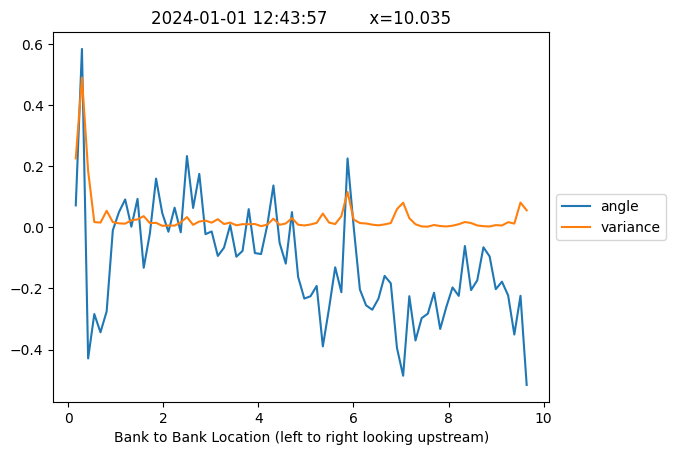

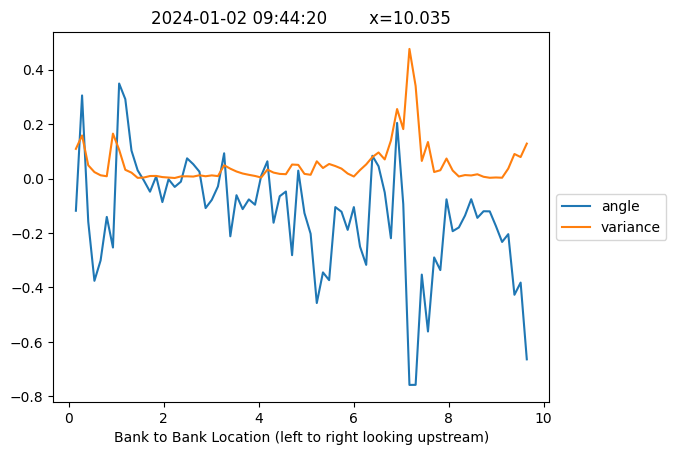

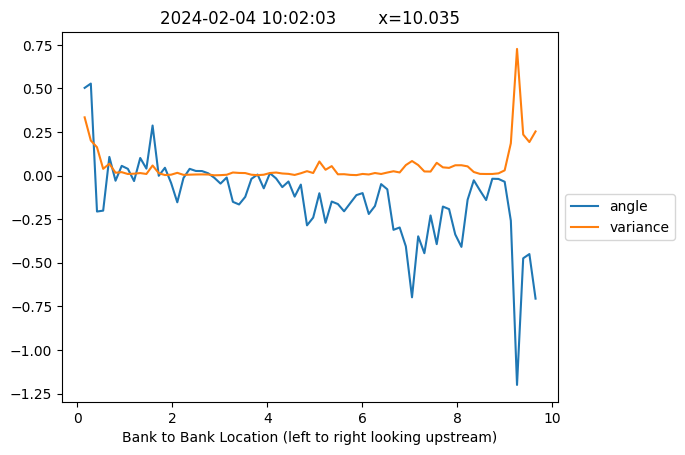

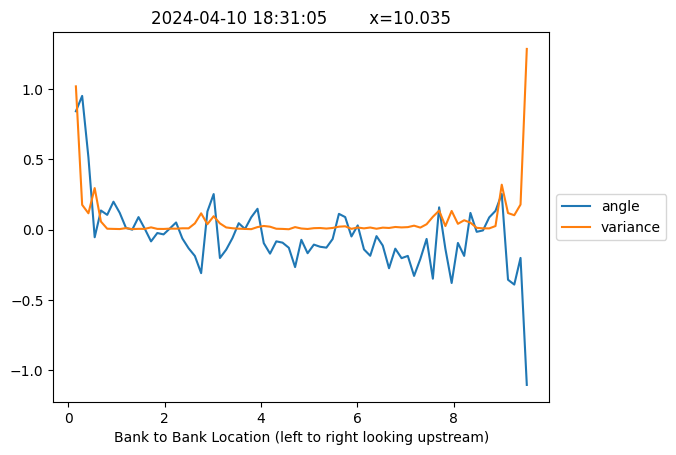

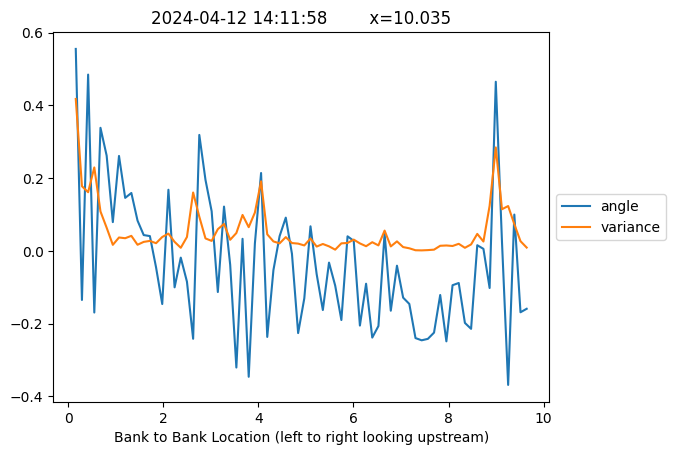

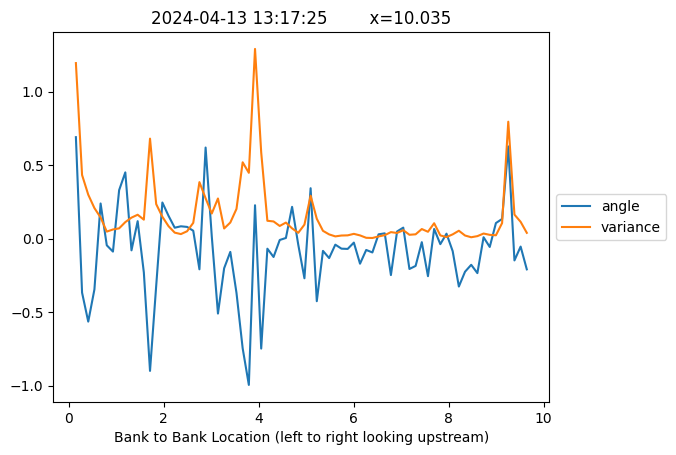

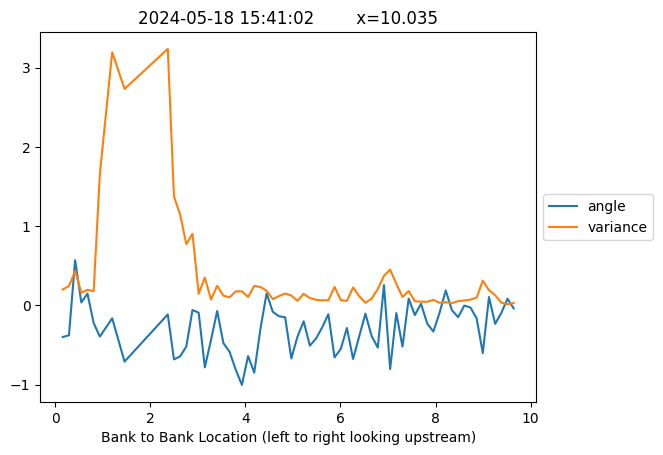

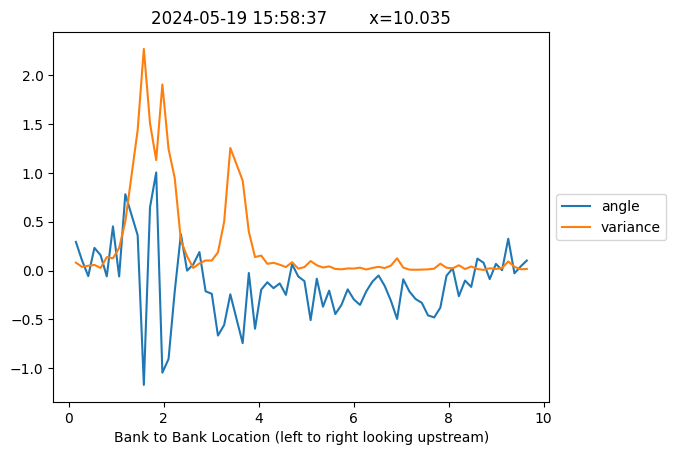

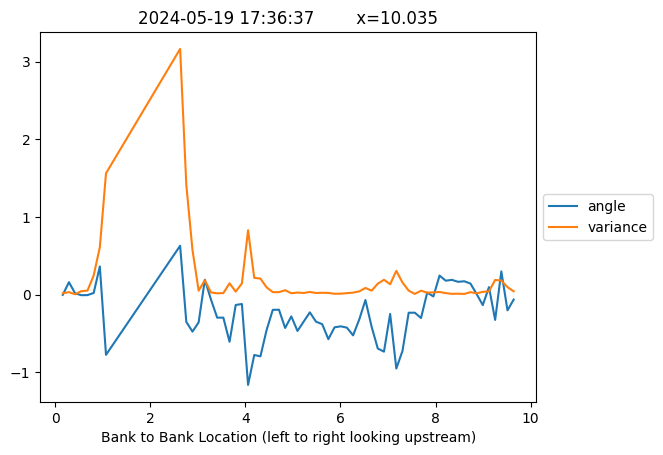

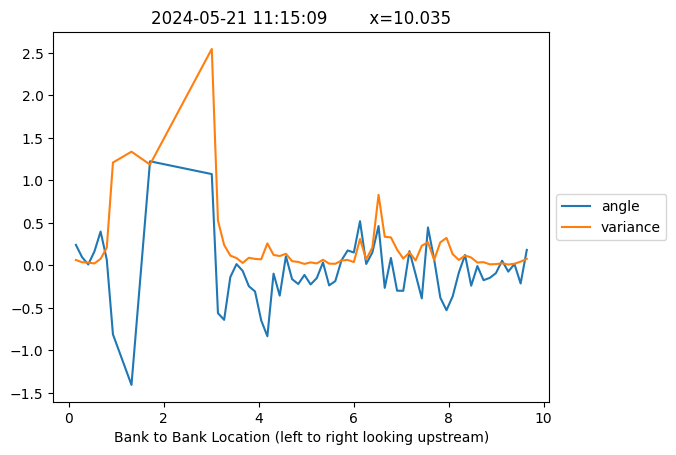

<Figure size 640x480 with 0 Axes>

In [7]:
for dt in sorted(df_samp.datetime.unique()):
    df_i = df_samp[(df_samp.datetime == dt) & (df_samp.x == 10.035)]

    sns.lineplot(
        data=df_i,
        x='y',
        y='angle',
        label='angle'
    )
    sns.lineplot(
        data=df_i,
        x='y',
        y='angle_var',
        label='variance'
    )
    # sns.lineplot(
    #     data=df_i,
    #     x='y',
    #     y='v_len',
    #     label='magnitude'
    # )
    plt.xlabel('Bank to Bank Location (left to right looking upstream)')
    plt.ylabel(None)
    plt.title(f'{dt}        x=10.035')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.clf()

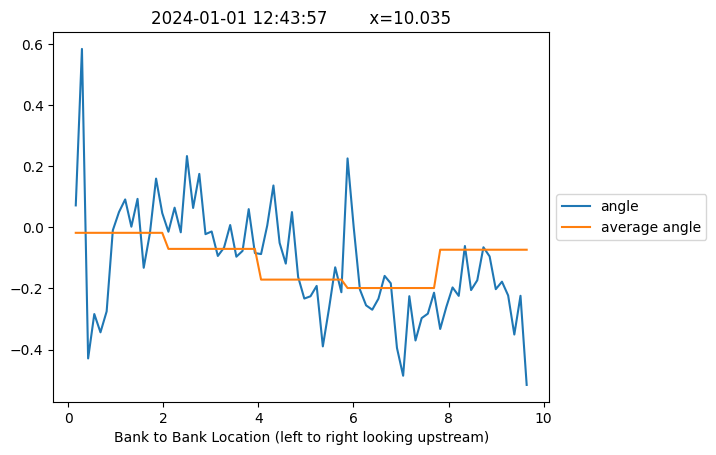

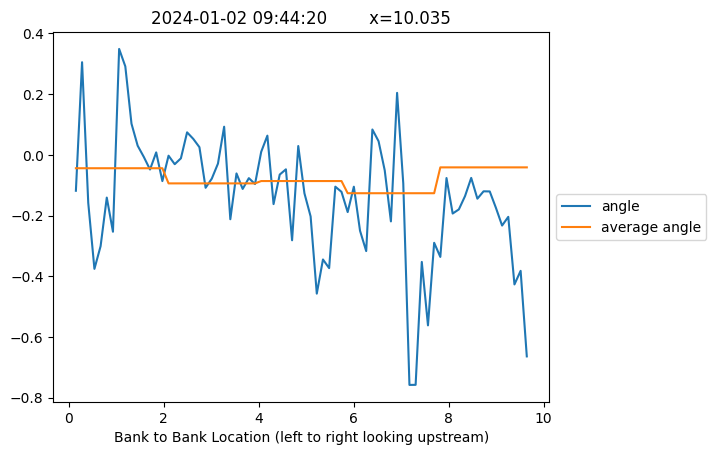

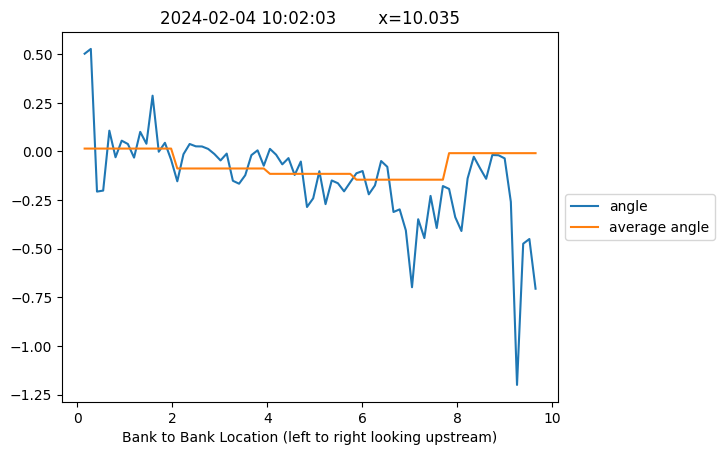

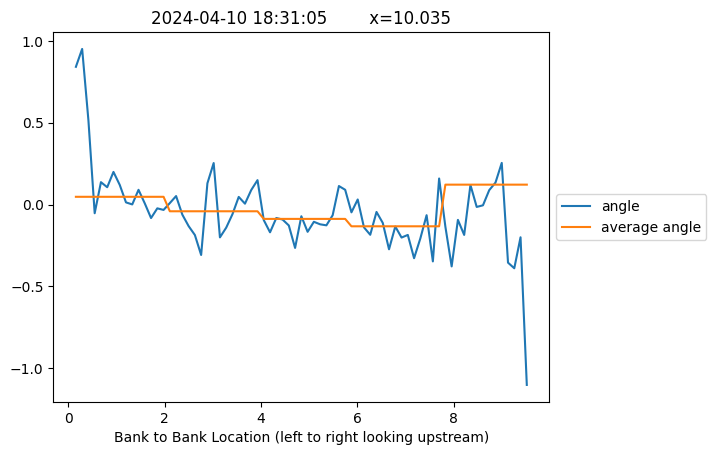

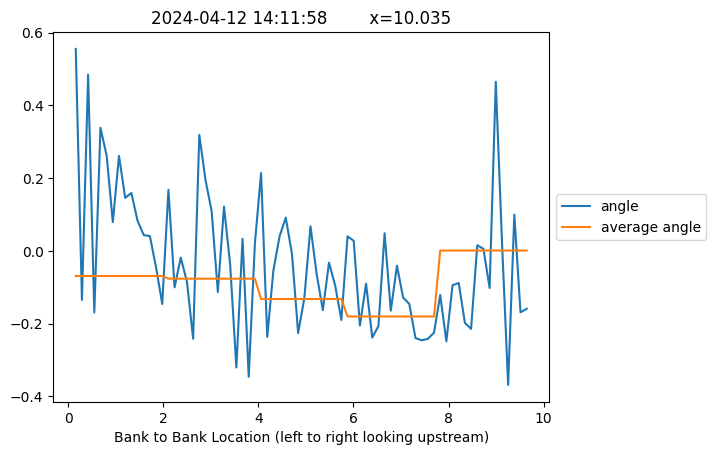

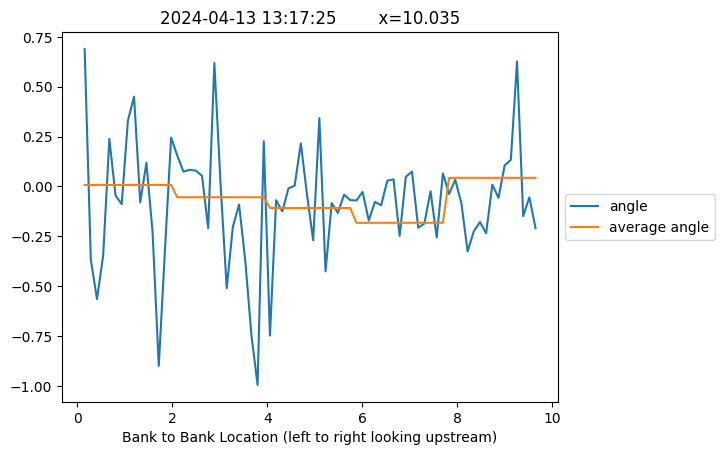

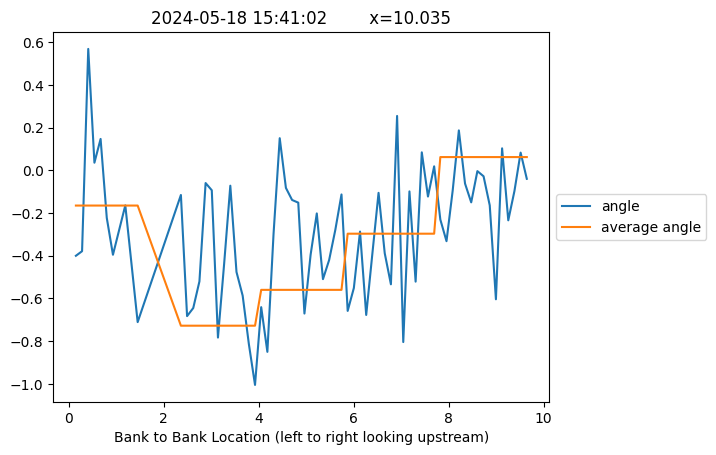

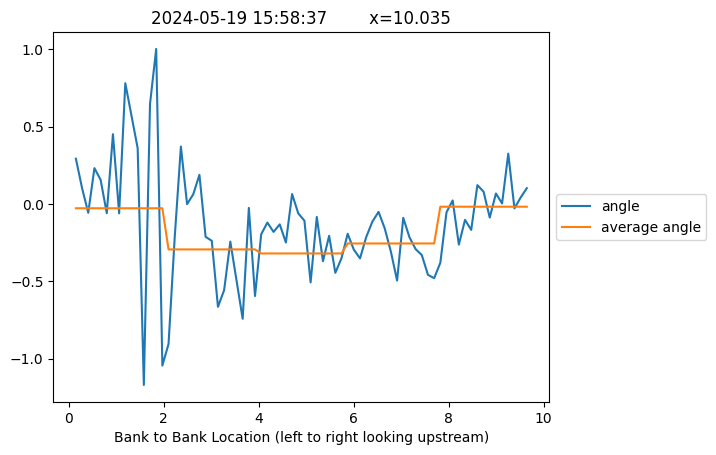

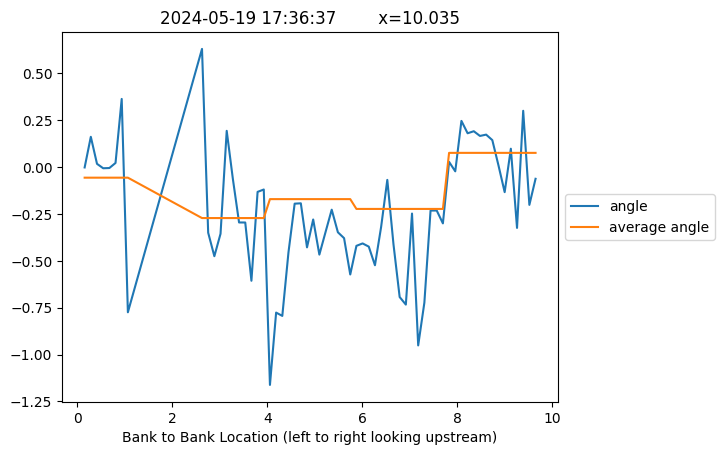

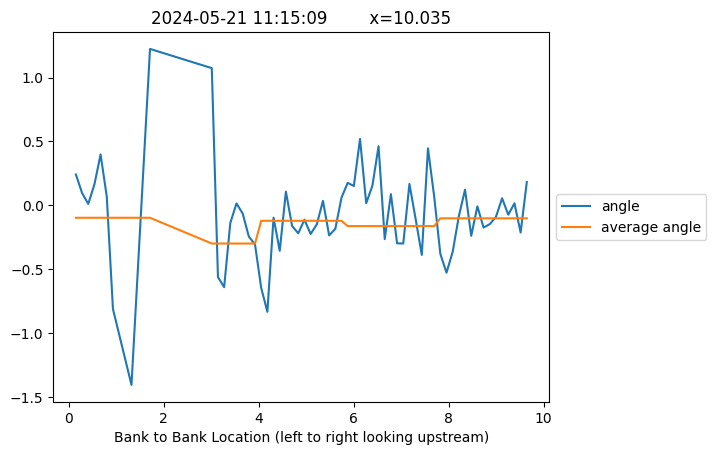

<Figure size 640x480 with 0 Axes>

In [ ]:
for dt in sorted(df_samp.datetime.unique()):
    df_i = df_samp[(df_samp.datetime == dt) & (df_samp.x == 10.035)]

    sns.lineplot(
        data=df_i,
        x='y',
        y='angle',
        label='angle'
    )
    sns.lineplot(
        data=df_i,
        x='y',
        y='angle_avg_byloc',
        label='average angle'
    )
    plt.xlabel('Bank to Bank Location (left to right looking upstream)')
    plt.ylabel(None)
    plt.title(f'{dt}        x=10.035')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.clf()